In [1]:
import autolens as al
import autolens.plot as aplt
import time
import numpy as np

In [2]:
imaging = al.Imaging.from_fits(
        image_path=f"arcs_resized.fits",
        noise_map_path=f"noise_map_resized.fits",
        psf_path=f"psf_resize.fits",
        pixel_scales=0.04,
    )

mask = al.Mask.circular_annular(centre=(0.0, 0.0),inner_radius=2, outer_radius=3.5,
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1,
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)
masked_imaging.grid.shape_2d

(250, 250)

In [3]:
#aplt.Imaging.subplot_imaging(
#    imaging=imaging, mask=mask, include=aplt.Include(border=True)
#)

In [4]:
mass = np.ones(35)*10
sigma = np.ones(35)*2
q = np.ones(35)*0.8

In [5]:
mass_profile = al.mp.MGE(centre=(0.0, 0.0))                        
mass_profile.MGE_comps(M=mass, sigma=sigma,
                       q=q, z_l=0.035, z_s=2.1)       

mass_profile.MGE_Grid_parameters(masked_imaging.grid)              
                                                                        

In [6]:

lens_galaxy = al.Galaxy(
    redshift=0.035,
    mass=mass_profile,
)

In [7]:
start = time.time()

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, al.Galaxy(redshift=2.1)])
source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=masked_imaging.grid)[1]

rectangular = al.pix.Rectangular(shape=(80, 80))
mapper = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid)

inversion = al.Inversion(
        masked_dataset=masked_imaging,
        mapper=mapper,
        regularization=al.reg.Constant(coefficient=1.0),
    )

print("Final", (time.time() - start))

17.460714101791382
Final 23.624863624572754


In [8]:
source_plane_grid

Grid([[ 3.46, -0.5 ],
      [ 3.46, -0.46],
      [ 3.46, -0.42],
      ...,
      [-3.46,  0.42],
      [-3.46,  0.46],
      [-3.46,  0.5 ]])

## Mudando o erro

In [37]:
mass_profile2 = al.mp.MGE(centre=(0.0, 0.0))                        
mass_profile2.MGE_comps(M=mass, sigma=sigma,
                       q=q, z_l=0.035, z_s=2.1)       

mass_profile2.MGE_Grid_parameters(masked_imaging.grid, epsrel=1e-20)              
                                                        

In [38]:

lens_galaxy2 = al.Galaxy(
    redshift=0.035,
    mass=mass_profile2,
)

In [39]:
start = time.time()

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy2, al.Galaxy(redshift=2.1)])
source_plane_grid2 = tracer.traced_grids_of_planes_from_grid(grid=masked_imaging.grid)[1]

rectangular = al.pix.Rectangular(shape=(80, 80))
mapper2 = rectangular.mapper_from_grid_and_sparse_grid(grid=source_plane_grid2)

inversion2 = al.Inversion(
        masked_dataset=masked_imaging,
        mapper=mapper2,
        regularization=al.reg.Constant(coefficient=1.0),
    )

print("Final", (time.time() - start))

17.646435737609863
Final 38.921820878982544


In [40]:
source_plane_grid2

Grid([[ 3.46, -0.5 ],
      [ 3.46, -0.46],
      [ 3.46, -0.42],
      ...,
      [-3.46,  0.42],
      [-3.46,  0.46],
      [-3.46,  0.5 ]])

In [41]:
source_plane_grid - source_plane_grid2

Grid([[0., 0.],
      [0., 0.],
      [0., 0.],
      ...,
      [0., 0.],
      [0., 0.],
      [0., 0.]])

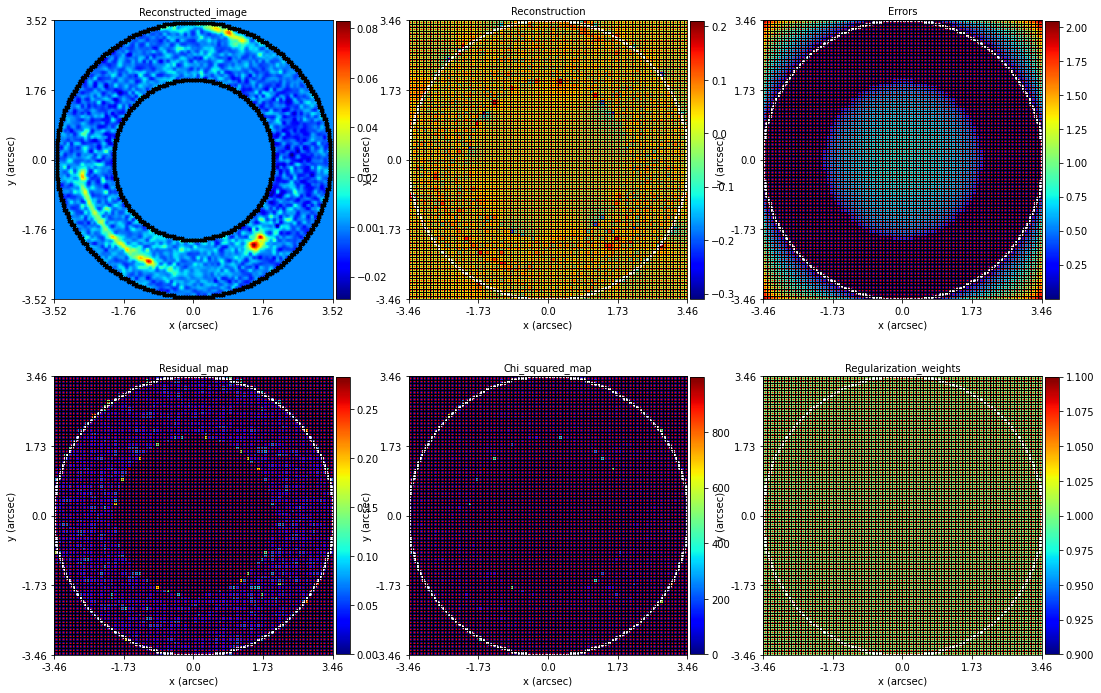

In [15]:
aplt.Inversion.subplot_inversion(inversion)

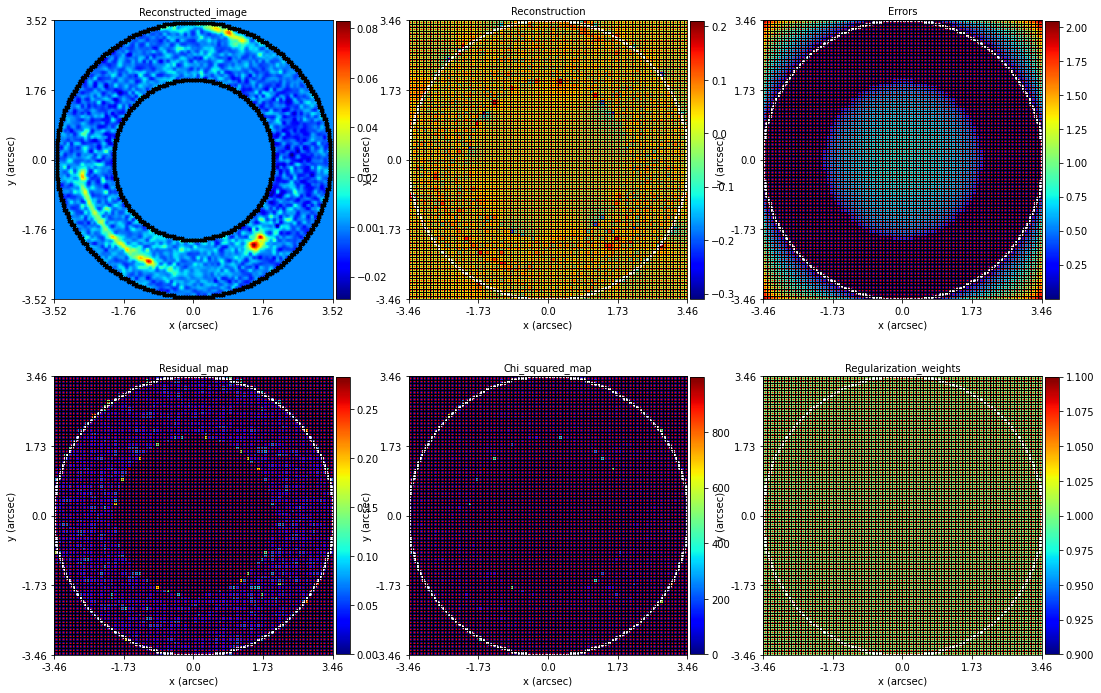

In [16]:
aplt.Inversion.subplot_inversion(inversion2)

In [20]:
inversion.reconstruction

array([-0.01548735, -0.0154674 , -0.0154121 , ..., -0.0090578 ,
       -0.00879621, -0.00866653])

In [21]:
inversion2.reconstruction

array([-0.01548735, -0.0154674 , -0.0154121 , ..., -0.0090578 ,
       -0.00879621, -0.00866653])

In [22]:
res = inversion.reconstruction - inversion2.reconstruction

In [25]:
res.min()

0.0

In [35]:
inversion.residual_map.max()

0.2828120959056047

In [36]:
inversion2.residual_map.max()

0.2828120959056047